<a href="https://colab.research.google.com/github/Joel-wawery/API-fetch/blob/main/probability_and_statistics_CAT2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

     date  tmax  tmin  tavg  departure  HDD  CDD precipitation new_snow  \
0  1/1/19    60    40  50.0       13.9   15    0          0.08        0   
1  2/1/19    41    35  38.0        2.1   27    0             0        0   
2  3/1/19    45    39  42.0        6.3   23    0             T        0   
3  4/1/19    47    37  42.0        6.5   23    0             0        0   
4  5/1/19    47    42  44.5        9.1   20    0          0.45        0   

  snow_depth  
0          0  
1          0  
2          0  
3          0  
4          0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           365 non-null    object 
 1   tmax           365 non-null    int64  
 2   tmin           365 non-null    int64  
 3   tavg           365 non-null    float64
 4   departure      365 non-null    float64
 5   HDD            365 non-null    int64  
 6

<ipython-input-7-a5e00654c0d4>:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'])
<ipython-input-7-a5e00654c0d4>:68: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(box_data, labels=box_labels, patch_artist=True)


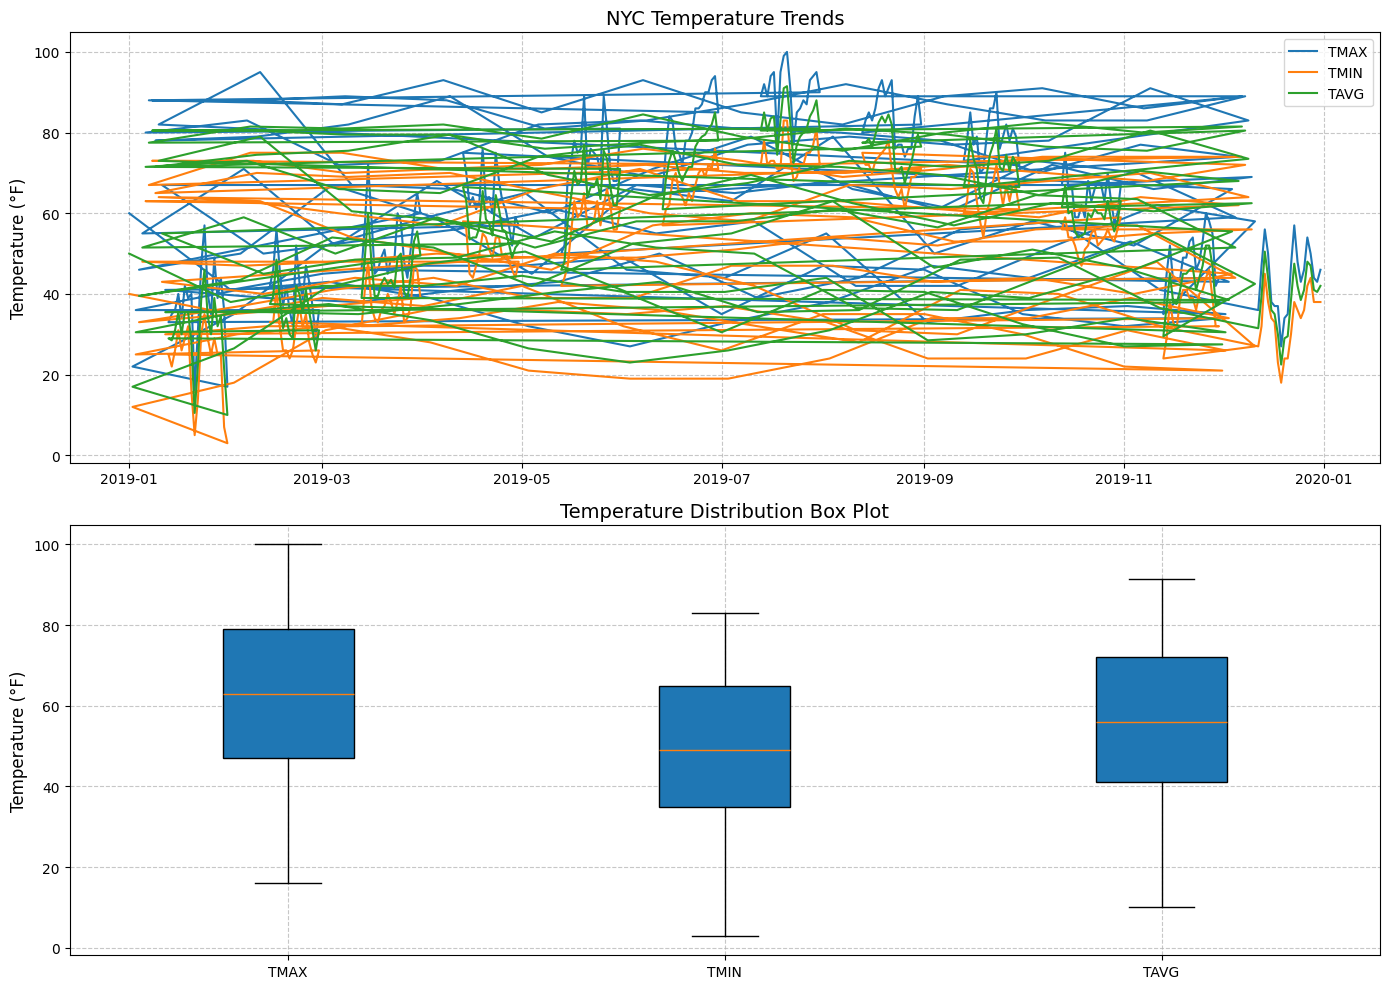

<Figure size 1400x600 with 0 Axes>

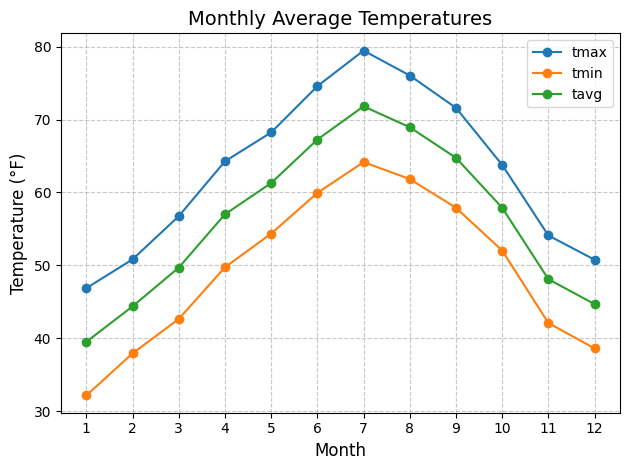


--- KEY FINDINGS AND OBSERVATIONS ---

Overall Temperature Statistics:
Mean Average Temperature: 56.34°F
Median Average Temperature: 56.00°F
Standard Deviation: 17.82°F
Temperature Range: 81.50°F

Temperature Extremes:
Hottest day: 2019-07-21 with average temperature of 91.50°F
Coldest day: 2019-01-31 with average temperature of 10.00°F

Temperature Departure Analysis:
Average departure from normal: -0.53°F
Days above normal: 183 (50.1%)
Days below normal: 178 (48.8%)
Days at normal: 4 (1.1%)

Seasonal Temperature Patterns:
            mean        std   min   max
month                                  
1      39.516129  18.736099  10.0  80.5
2      44.375000  17.282310  26.0  81.5
3      49.693548  12.080064  35.0  81.0
4      57.000000  10.980390  33.5  82.0
5      61.290323  12.625882  26.5  78.5
6      67.250000  15.082960  23.0  85.0
7      71.806452  17.980859  26.0  91.5
8      68.935484  15.276203  31.0  84.5
9      64.750000  14.118190  28.5  81.0
10     57.903226  10.922774  

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv("nyc_temperature.csv")
print(df.head())
print(df.info())
print(df.columns)

# Data cleaning
# Check if there's a date column and convert it to datetime
if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'])
else:
    # Try to identify a date column by name pattern
    date_columns = [col for col in df.columns if 'date' in col.lower() or 'time' in col.lower()]
    if date_columns:
        df[date_columns[0]] = pd.to_datetime(df[date_columns[0]])
        df['date'] = df[date_columns[0]]

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

# Shape before and after dropping NAs
print("\nShape before dropping NaNs:", df.shape)
df_clean = df.dropna()
print("Shape after dropping NaNs:", df_clean.shape)

# Descriptive statistics for temperature columns
temp_cols = ['tmax', 'tmin', 'tavg', 'departure', 'HDD', 'precipitation']
for col in temp_cols:
    if col in df_clean.columns:
        print(f"\nDescriptive statistics for {col}:")
        print(df_clean[col].describe())

# Create a figure with multiple subplots
plt.figure(figsize=(14, 10))

# 1. Line plot for temperature trends
plt.subplot(2, 1, 1)
if 'date' in df_clean.columns:
    for col in ['tmax', 'tmin', 'tavg']:
        if col in df_clean.columns:
            plt.plot(df_clean['date'], df_clean[col], label=f"{col.upper()}")
else:
    # Use index if no date column
    for col in ['tmax', 'tmin', 'tavg']:
        if col in df_clean.columns:
            plt.plot(df_clean[col], label=f"{col.upper()}")

plt.title('NYC Temperature Trends', fontsize=14)
plt.ylabel('Temperature (°F)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

# 2. Box plot for temperature distribution
plt.subplot(2, 1, 2)
box_data = []
box_labels = []

for col in ['tmax', 'tmin', 'tavg']:
    if col in df_clean.columns:
        box_data.append(df_clean[col])
        box_labels.append(col.upper())

plt.boxplot(box_data, labels=box_labels, patch_artist=True)
plt.title('Temperature Distribution Box Plot', fontsize=14)
plt.ylabel('Temperature (°F)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig('nyc_temp_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# Additional analysis - Monthly patterns
plt.figure(figsize=(14, 6))

if 'date' in df_clean.columns:
    # Extract month from date
    df_clean['month'] = df_clean['date'].dt.month

    # Monthly averages
    monthly_avg = df_clean.groupby('month')[['tmax', 'tmin', 'tavg']].mean()

    # Plot monthly averages
    monthly_avg.plot(kind='line', marker='o')
    plt.title('Monthly Average Temperatures', fontsize=14)
    plt.xlabel('Month', fontsize=12)
    plt.ylabel('Temperature (°F)', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.xticks(range(1, 13))
    plt.legend()

    plt.tight_layout()
    plt.savefig('nyc_temp_monthly.png', dpi=300, bbox_inches='tight')
    plt.show()

# Calculate key statistics and trends
print("\n--- KEY FINDINGS AND OBSERVATIONS ---")

if 'tavg' in df_clean.columns:
    # Overall temperature statistics
    mean_temp = df_clean['tavg'].mean()
    median_temp = df_clean['tavg'].median()
    std_temp = df_clean['tavg'].std()
    range_temp = df_clean['tavg'].max() - df_clean['tavg'].min()

    print(f"\nOverall Temperature Statistics:")
    print(f"Mean Average Temperature: {mean_temp:.2f}°F")
    print(f"Median Average Temperature: {median_temp:.2f}°F")
    print(f"Standard Deviation: {std_temp:.2f}°F")
    print(f"Temperature Range: {range_temp:.2f}°F")

    # Identify temperature extremes
    hottest_day = df_clean.loc[df_clean['tavg'].idxmax()]
    coldest_day = df_clean.loc[df_clean['tavg'].idxmin()]

    if 'date' in df_clean.columns:
        print(f"\nTemperature Extremes:")
        print(f"Hottest day: {hottest_day['date'].strftime('%Y-%m-%d')} with average temperature of {hottest_day['tavg']:.2f}°F")
        print(f"Coldest day: {coldest_day['date'].strftime('%Y-%m-%d')} with average temperature of {coldest_day['tavg']:.2f}°F")

    # Temperature departure analysis
    if 'departure' in df_clean.columns:
        mean_departure = df_clean['departure'].mean()
        days_above = (df_clean['departure'] > 0).sum()
        days_below = (df_clean['departure'] < 0).sum()
        days_normal = (df_clean['departure'] == 0).sum()

        print(f"\nTemperature Departure Analysis:")
        print(f"Average departure from normal: {mean_departure:.2f}°F")
        print(f"Days above normal: {days_above} ({days_above/len(df_clean)*100:.1f}%)")
        print(f"Days below normal: {days_below} ({days_below/len(df_clean)*100:.1f}%)")
        print(f"Days at normal: {days_normal} ({days_normal/len(df_clean)*100:.1f}%)")

    # Seasonal patterns if date is available
    if 'date' in df_clean.columns and 'month' in df_clean.columns:
        seasonal_stats = df_clean.groupby('month')['tavg'].agg(['mean', 'std', 'min', 'max'])

        print("\nSeasonal Temperature Patterns:")
        print(seasonal_stats)

        # Identify month with highest variability
        most_variable_month = seasonal_stats['std'].idxmax()
        print(f"\nMonth with highest temperature variability: {most_variable_month} (std dev: {seasonal_stats.loc[most_variable_month, 'std']:.2f}°F)")




     date  tmax  tmin  tavg  departure  HDD  CDD precipitation new_snow  \
0  1/1/19    60    40  50.0       13.9   15    0          0.08        0   
1  2/1/19    41    35  38.0        2.1   27    0             0        0   
2  3/1/19    45    39  42.0        6.3   23    0             T        0   
3  4/1/19    47    37  42.0        6.5   23    0             0        0   
4  5/1/19    47    42  44.5        9.1   20    0          0.45        0   

  snow_depth  
0          0  
1          0  
2          0  
3          0  
4          0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           365 non-null    object 
 1   tmax           365 non-null    int64  
 2   tmin           365 non-null    int64  
 3   tavg           365 non-null    float64
 4   departure      365 non-null    float64
 5   HDD            365 non-null    int64  
 6

<Figure size 800x600 with 0 Axes>

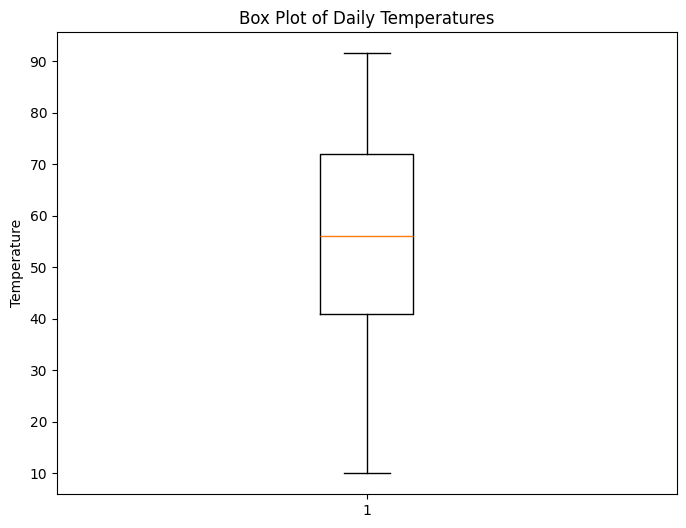

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("nyc_temperature.csv")
print(df.head())
print(df.info())
print(df.columns)


# data cleaning and preparations for the temp max
df['tmax'] = pd.to_datetime(df['tmax'])
# checking for missing data values
print(df.isnull().sum)
df = df.dropna()

# confirming changes to our dataset and number of rows dropped and those remaining
print("shape before fropping Nans:", df.shape)
df = df.dropna()
print("shape after dropping Nans:", df.shape)

# exporing the dataset with statistics to get
#count , min/max , mean , standard deviation ,quartiles for temp values
print(df['tmax'].describe())
print(df['tmin'].describe())
print(df['tavg'].describe())
print(df['departure'].describe())
print(df['HDD'].describe())
print(df['precipitation'].describe())
# visualizing the data using histogram(distribution of temperature values)
plt.figure(figsize=(8, 6))
# Assuming 'tavg' column contains the average daily temperature

# a box plot to visualize the dataset
plt.figure(figsize=(8, 6))
plt.boxplot(df['tavg'])
plt.title('Box Plot of Daily Temperatures')
plt.ylabel('Temperature')
plt.show()